### Stretched PDFT H_2+

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from CADMium import Pssolver, Psgrid, Partition, Inverter
import CADMium

In [4]:
# dis_eq      = np.linspace(1.0,5,30)
# dis_st      = np.linspace(5.1,10,10)
# dis_eq      = np.linspace(1.0,5,10)
# dis_st      = np.linspace(5.1,10,3)
# distances   = np.concatenate((dis_eq, dis_st))
distances = [1.0,1.5,2.0,3.0,6.0,10]
# distances = [2.0]
energy  = []

for d in distances:
    a = d/2
    Za, Zb = 1,1
    pol = 2

    #Set up grid
    NP = 7
    NM = [6,6]
    L = np.arccosh(10/a)
    loc = np.array(range(-4,5)) #Stencil outline
    grid = Psgrid(NP, NM, a, L, loc)
    grid.initialize()


    #Fragment a electrons [alpha, beta]

    #Fragment a electrons [alpha, beta]
    Nmo_a = [[1,0]]; Nmo_A = [[1,0]] #Number of molecular orbitals to calculate
    N_a   = [[1,0]]; N_A   = [[0,0]]
    nu_a = 0.5

    #Fragment b electrons
    Nmo_b = [[1,0]]; Nmo_B = [[1,0]]
    N_b   = [[1,0]]; N_B   = [[0,0]] 
    nu_b = 0.5

    #Molecular elctron configuration
    Nmo_m = [[1,0]]
    N_m   = [[1,0]]



    part = Partition(grid, Za, Zb, pol, [Nmo_a, Nmo_A], [N_a, N_A], nu_a, 
                                        [Nmo_b, Nmo_B], [N_b, N_B], nu_b, {    "AB_SYM"            : True,
                                                                                                               "interaction_type"  : "dft", 
                                                                                                               "kinetic_part_type" : "libxcke",
                                                                                                               "hxc_part_type"     : "overlap_hxc",
                                                                                                               "k_family"          : "gga", 
                                                                                                               "ke_func_id"        : 500,
                                                                                                                })

    #Setup inverter object
    mol_solver = Pssolver(grid, Nmo_m, N_m)
    part.inverter = Inverter(grid, mol_solver, {  "AB_SYM"         : True, 
                                                  "use_iterative"  : False,
                                                  "invert_type"    : "wuyang",
                                                  "DISP"           : False,  
                                                })

    part.optPartition.isolated = True
    part.scf({"disp"  : False,
              "alpha" : [0.6],
              "e_tol" : 1e-6})

    part.optPartition.isolated   = False
    part.scf({"disp"       : False,
              "alpha"      : [0.6],
              "max_iter"   : 20,
              "e_tol"      : 1e-6,
              "iterative"  : False,
              "continuing" : True})

    energy.append(part.E.E)
    print(f"Done with {d}")
    
    
energy    = np.array(energy)
# np.save('h2plus_distance.npy', distances)
# np.save('h2plus_overlap.npy', energy)

----> Begin SCF calculation for *Isolated* Fragments

                Total Energy (a.u.)       

                __________________        

Iteration         A            B              res     

_______________________________________________________

    1           -0.24679     -0.24679       1.000e+00 
    2           -0.24169     -0.24169       1.976e-02 
    3           -0.24007     -0.24007       6.216e-03 
    4           -0.23957     -0.23957       1.924e-03 
    5           -0.23942     -0.23942       5.847e-04 
    6           -0.23937     -0.23937       1.739e-04 
    7           -0.23936     -0.23936       4.979e-05 
    8           -0.23935     -0.23935       1.338e-05 
    9           -0.23935     -0.23935       3.175e-06 
   10           -0.23935     -0.23935       5.383e-07 
Done with 1.0
----> Begin SCF calculation for *Isolated* Fragments

                Total Energy (a.u.)       

                __________________        

Iteration         A            B       

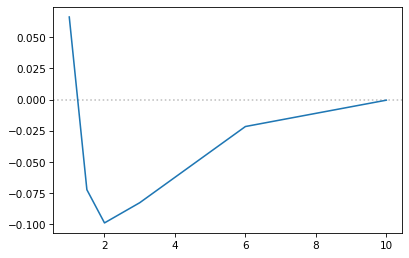

In [27]:
h_energy  = -0.24
energy    = np.array(energy)

fig, ax = plt.subplots(1,1, dpi=75)
ax.axhline(y=0, alpha=0.5, c="grey", ls=":")
ax.plot(distances, energy - 2 * h_energy)
# ax.set_ylim(-0.12,0.1)

In [14]:
# TEST

In [15]:
a = 2/2
Za, Zb = 1,1
pol = 2

#Fragment a electrons [alpha, beta]
Nmo_a = [[1,0]]; Nmo_A = [[1,0]] #Number of molecular orbitals to calculate
N_a   = [[1,0]]; N_A   = [[0,0]]
nu_a = 0.5

#Fragment b electrons
Nmo_b = [[1,0]]; Nmo_B = [[1,0]]
N_b   = [[1,0]]; N_B   = [[0,0]] 
nu_b = 0.5

#Molecular elctron configuration
Nmo_m = [[1,0]]
N_m   = [[1,0]]

#Set up grid
NP = 7
NM = [4,4]
L = np.arccosh(10/a)
loc = np.array(range(-4,5)) #Stencil outline
grid = Psgrid(NP, NM, a, L, loc)
grid.initialize()


part = Partition(grid, Za, Zb, pol, np.concatenate((Nmo_a, Nmo_A)), np.concatenate((N_a, N_A)), nu_a, 
                                    np.concatenate((Nmo_b, Nmo_B)), np.concatenate((N_b, N_B)), nu_b, {    "AB_SYM"            : True,
                                                                                                           "interaction_type"  : "dft", 
                                                                                                           "kinetic_part_type" : "libxcke",
                                                                                                           "hxc_part_type"     : "overlap_hxc",
                                                                                                           "k_family"          : "gga", 
                                                                                                           "ke_func_id"        : 500,
                                                                                                            })

#Setup inverter object
mol_solver = Pssolver(grid, Nmo_m, N_m)
part.inverter = Inverter(grid, mol_solver, {"AB_SYM"         : True,
                                            "ENS_SPIN_SYM"   : False,  
                                            "use_iterative"  : False,
                                            "invert_type"    : "wuyang",
                                            "disp"           : True,  
                                            })

#Isolated Fragments
part.optPartition.isolated = True
part.scf({"disp"  : True,
          "alpha" : [0.6],
          "e_tol" : 1e-8})

#Interacting fragments under vp
part.optPartition.isolated   = False
part.scf({"disp"     : True,
          "alpha"      : [0.6],
          "max_iter"   : 200,
          "e_tol"      : 1e-5,
          "iterative"  : False,
          "continuing" : True})

                  Total Energy            

                __________________        

Iteration         A            B              res     

_______________________________________________________

    1           -0.24679     -0.24679       1.000e+00 
    2           -0.24169     -0.24169       6.139e-01 
    3           -0.24007     -0.24007       1.627e-01 
    4           -0.23957     -0.23957       4.803e-02 
    5           -0.23942     -0.23942       1.441e-02 
    6           -0.23937     -0.23937       4.263e-03 
    7           -0.23936     -0.23936       1.218e-03 
    8           -0.23935     -0.23935       3.271e-04 
    9           -0.23935     -0.23935       7.760e-05 
   10           -0.23935     -0.23935       1.314e-05 
   11           -0.23935     -0.23935       8.375e-07 
   12           -0.23935     -0.23935       2.442e-06 
   13           -0.23935     -0.23935       1.718e-06 
   14           -0.23935     -0.23935       9.537e-07 
   15           -0.23935     

In [34]:
vars(part.E)

{'Ea': -0.21261391666219603,
 'Eb': -0.21261391666219603,
 'Ef': -0.42522783332439207,
 'Tsf': 0.6419012008412587,
 'Eksf': array([[-0.79224848,  0.        ]]),
 'Enucf': -1.0955758128947057,
 'Exf': -0.3090971334277098,
 'Ecf': -0.023736206995989655,
 'Ehf': 0.36128011915275443,
 'Vhxcf': 0.28330575478424713,
 'Ep': -0.6540096116762366,
 'Ep_pot': -0.5689834260754593,
 'Ep_kin': -0.07871945379408951,
 'Ep_hxc': -0.006306731806687867,
 'Et': -1.0792374450006288,
 'Vnn': 0.5,
 'E': -0.5792374450006288,
 'evals_a': array([], dtype=float64),
 'evals_b': array([], dtype=float64),
 'S': 0.36349421310139707,
 'F': 0.6961051543833872,
 'Ehcor': 0.0,
 'Ep_h': -0.03942091105271872,
 'Ep_x': 0.02948195670208792,
 'Ep_c': 0.0008789269007918529}